In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,recall_score,precision_score,f1_score,plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Problem statement

#### exploratary Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Outlier Handling

<AxesSubplot:>

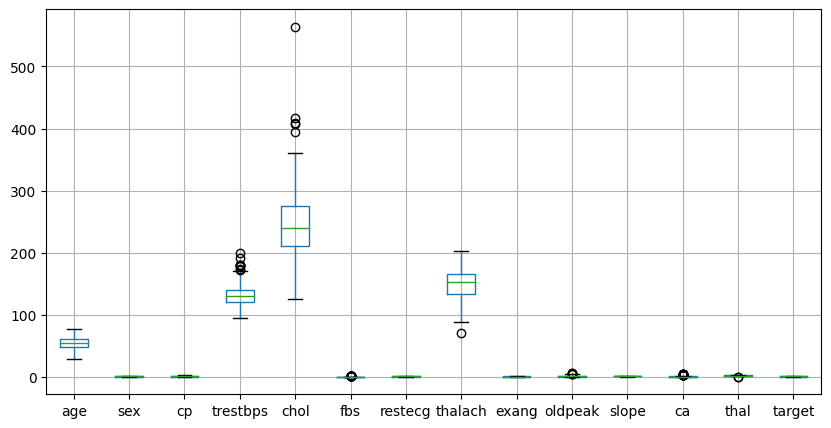

In [7]:
df.boxplot(figsize=(10,5))

In [10]:
from scipy.stats import zscore
z_score_value=np.abs(zscore(df["trestbps"]))
z_score_value

0      0.763956
1      0.092738
2      0.092738
3      0.663867
4      0.663867
         ...   
298    0.478391
299    1.234996
300    0.706843
301    0.092738
302    0.092738
Name: trestbps, Length: 303, dtype: float64

In [12]:
array=np.where(z_score_value>2)
array

(array([  8,  71, 101, 110, 124, 152, 195, 203, 223, 228, 241, 248, 260,
        266, 292], dtype=int64),)

In [13]:
df[["trestbps"]].iloc[array]

,trestbps
8,172
71,94
101,178
110,180
124,94
152,170
195,170
203,180
223,200
228,170


In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
array1=df["trestbps"].to_numpy()

In [17]:
array1[array]=df["trestbps"].mean()

<AxesSubplot:>

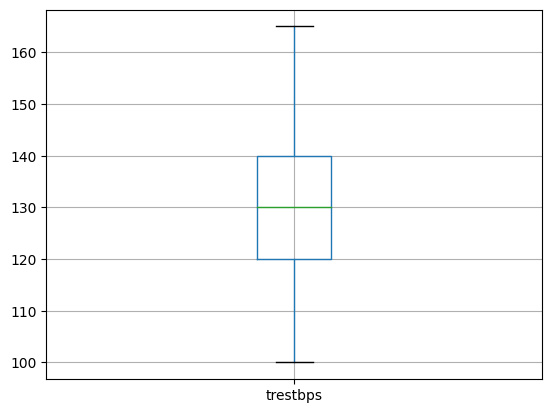

In [19]:
df[["trestbps"]].boxplot()

<AxesSubplot:>

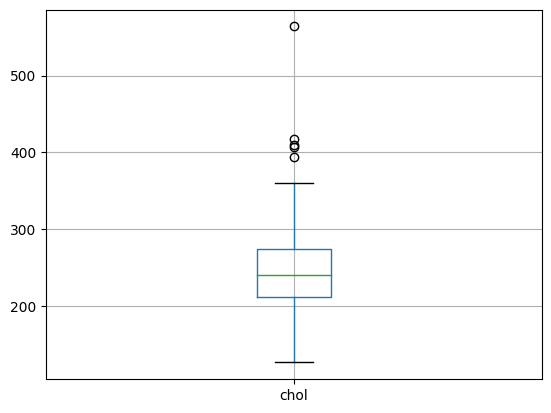

In [20]:
df[["chol"]].boxplot()

<AxesSubplot:>

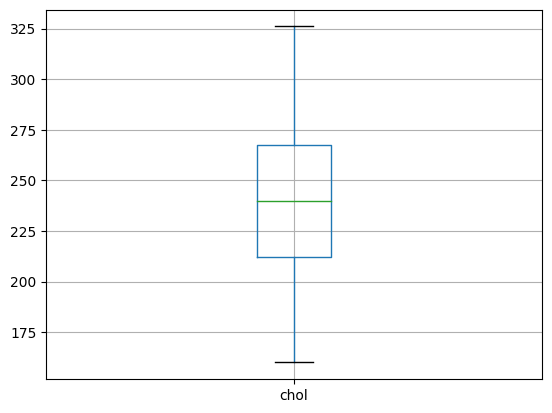

In [23]:
z_score_value=np.abs(zscore(df["chol"]))
z_score_value
array=np.where(z_score_value>2)
array
array1=df["chol"].to_numpy()
array1[array]=df["chol"].median()
df[["chol"]].boxplot()

<AxesSubplot:>

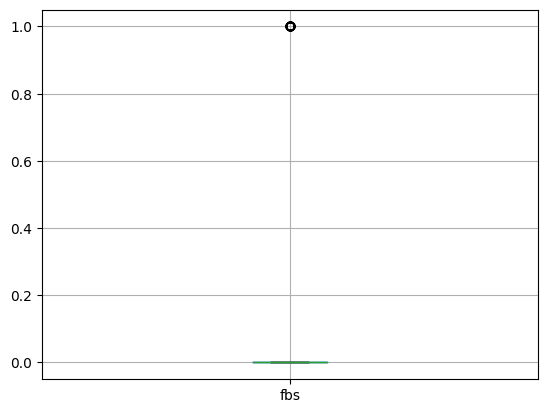

In [24]:
df[["fbs"]].boxplot()

In [25]:
df["fbs"]

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 303, dtype: int64

<AxesSubplot:>

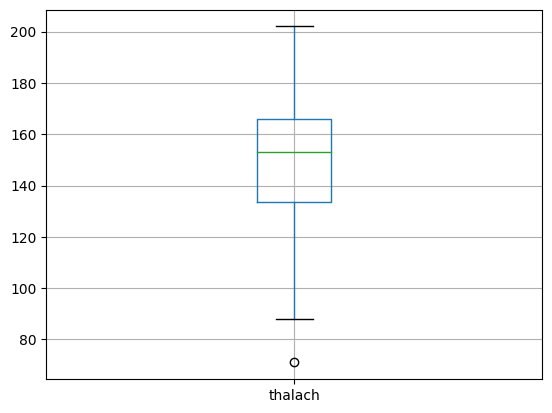

In [26]:
df[["thalach"]].boxplot()

array([], dtype=int64)

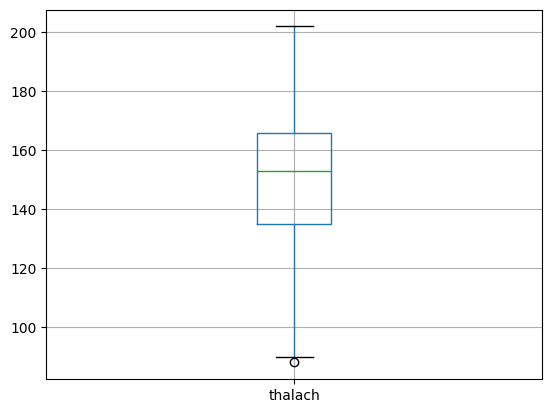

In [33]:
z_score_value=np.abs(zscore(df["thalach"]))
z_score_value
array=np.where(z_score_value>3)
array
array1=df["thalach"].to_numpy()
array1[array]=df["thalach"].median()
df[["thalach"]].boxplot()
array1[array]

<AxesSubplot:>

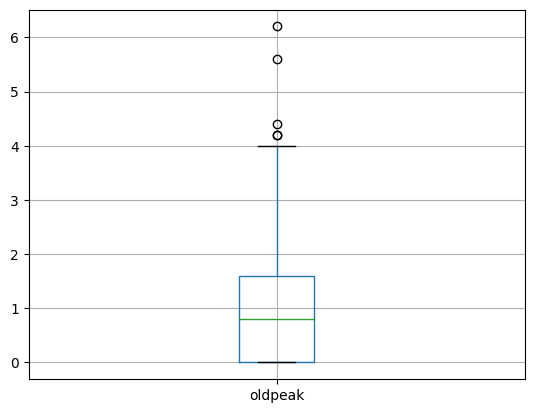

In [34]:
df[["oldpeak"]].boxplot()

array([], dtype=float64)

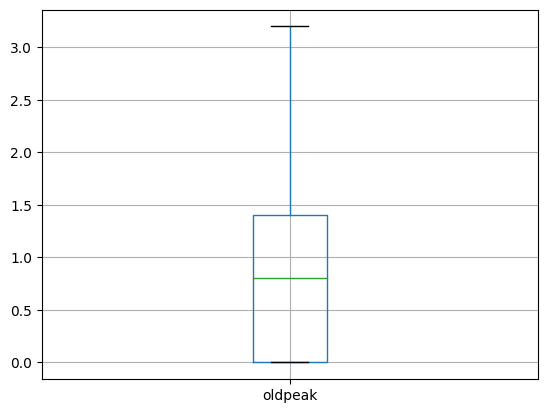

In [38]:
z_score_value=np.abs(zscore(df["oldpeak"]))
z_score_value
array=np.where(z_score_value>3)
array
array1=df["oldpeak"].to_numpy()
array1[array]=df["oldpeak"].median()
df[["oldpeak"]].boxplot()
array1[array]

<AxesSubplot:>

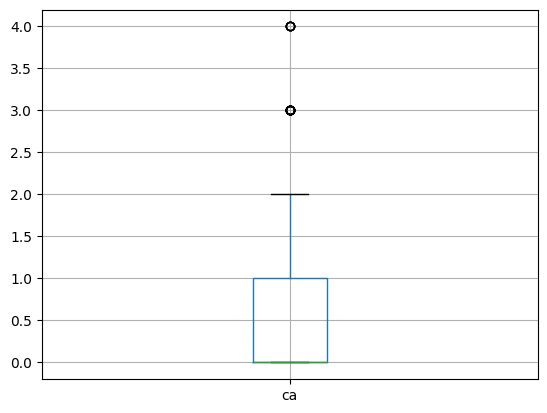

In [39]:
df[["ca"]].boxplot()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

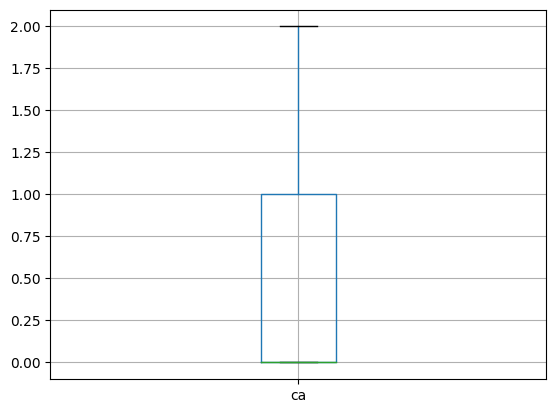

In [41]:
z_score_value=np.abs(zscore(df["ca"]))
z_score_value
array=np.where(z_score_value>2)
array
array1=df["ca"].to_numpy()
array1[array]=df["ca"].median()
df[["ca"]].boxplot()
array1[array]

<AxesSubplot:>

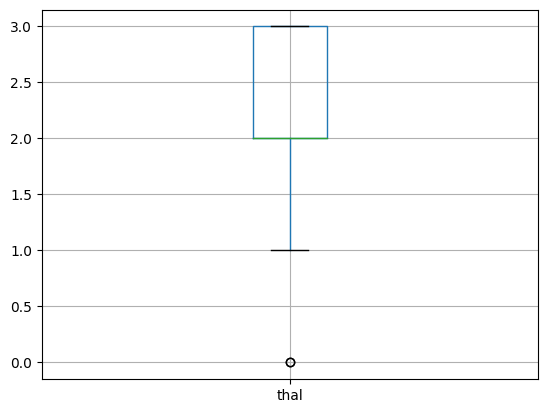

In [42]:
df[["thal"]].boxplot()

array([2, 2], dtype=int64)

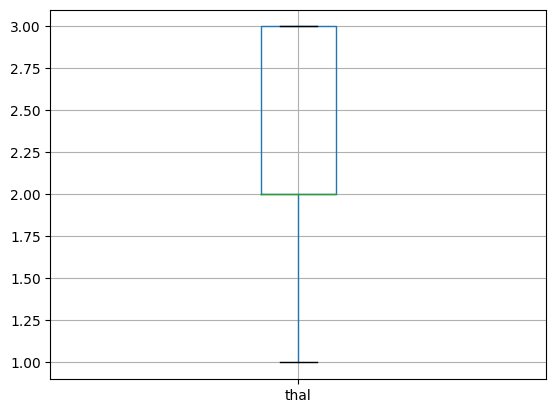

In [45]:
z_score_value=np.abs(zscore(df["thal"]))
z_score_value
array=np.where(z_score_value>3)
array
array1=df["thal"].to_numpy()
array1[array]=df["thal"].median()
df[["thal"]].boxplot()
array1[array]

### vif factor

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0.8,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,240,0,1,163,1,0.6,2,0,2,1


In [48]:
x=df.drop("target",axis=1)

<AxesSubplot:>

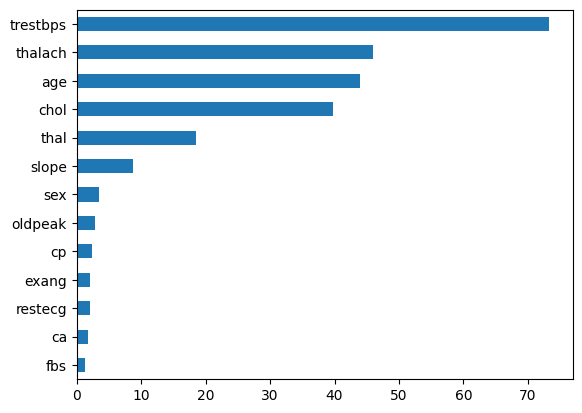

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
lst=[]
for i in range(x.shape[1]):
    vif=variance_inflation_factor(x,i)
    lst.append(vif)
    
lst
s1=pd.Series(lst,index=x.columns)
s1=s1.sort_values()
s1.plot(kind="barh")

### Train test split

In [56]:
x
y=df["target"]

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)

### Model training

In [59]:
logistic_model=LogisticRegression()

In [60]:
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [62]:
y_pred=logistic_model.predict(x_test)
y_pred_train=logistic_model.predict(x_train)

In [63]:
y_pred_probabilitis=logistic_model.predict_proba(x_test)

<AxesSubplot:>

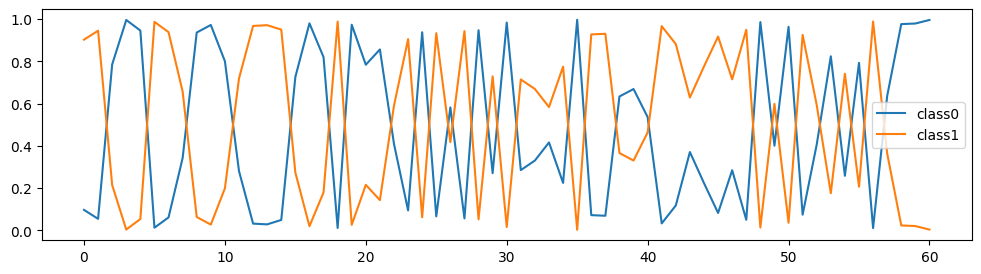

In [90]:
dfnew=pd.DataFrame(y_pred_probabilitis,columns=["class0","class1"])
dfnew.plot(kind="line",figsize=(12,3))


### confusion matrix for test

In [71]:
confusion_mat=confusion_matrix(y_test,y_pred)
print("confusion matrix for test is\n",confusion_mat)

confusion matrix for test is
 [[23  5]
 [ 5 28]]


### classification report for test

In [72]:
classification_rep=classification_report(y_test,y_pred)
print("classification report for test is\n ",classification_rep)


classification report for test is
                precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



### confusion matrix  and classification report for training data

In [77]:
confusion_mat=confusion_matrix(y_train,y_pred_train)
print("confusion matrix for train is\n",confusion_mat)



classification_rep=classification_report(y_train,y_pred_train)
print("classification report for train is\n ",classification_rep)



confusion matrix for train is
 [[ 85  25]
 [ 13 119]]
classification report for train is
                precision    recall  f1-score   support

           0       0.87      0.77      0.82       110
           1       0.83      0.90      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242



### AUC,ROC curve

In [78]:
from sklearn.metrics import auc,roc_auc_score,roc_curve
y_train_probability=logistic_model.predict_proba(x_train)
fpr,tpr,thresh=roc_curve(y_train,y_train_probability[:,1])

In [85]:
df1["fpr"]=fpr
df1["tpr"]=tpr
df1["thresh"]=thresh
df1

,fpr,tpr,thresh
0,0.000000,0.000000,1.992112
1,0.000000,0.007576,0.992112
2,0.000000,0.196970,0.952612
3,0.000000,0.212121,0.952588
4,0.000000,0.242424,0.951671
...,...,...,...
59,0.518182,0.984848,0.110652
60,0.518182,0.992424,0.110623
61,0.881818,0.992424,0.015235
62,0.881818,1.000000,0.013264


<AxesSubplot:>

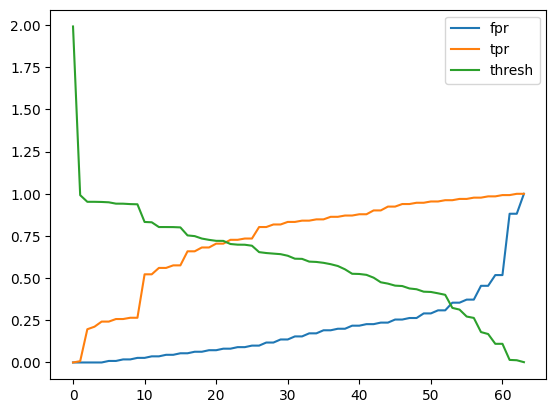

In [88]:
df1.plot(kind="line")

### Auc roc curve

Text(0.5, 1.0, 'roc_curve')

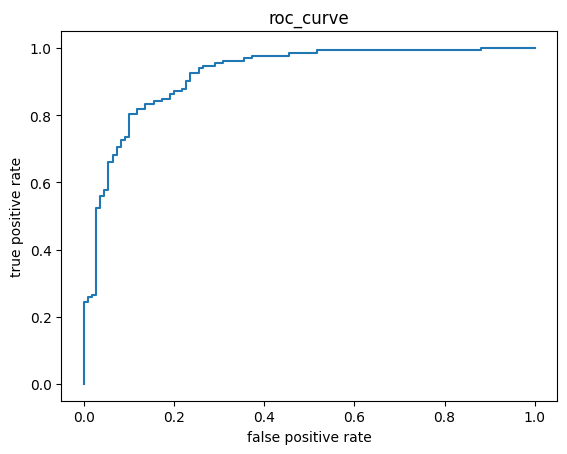

In [91]:
plt.plot(fpr,tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("roc_curve")

### User input

In [92]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [111]:
dict1={"columns":list(x.columns)}
dict1

{'columns': ['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalach',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal']}

In [96]:
x.head(1).T

,0
age,63.0
sex,1.0
cp,3.0
trestbps,145.0
chol,233.0
fbs,1.0
restecg,0.0
thalach,150.0
exang,0.0
oldpeak,2.3


In [97]:
age=63.0
sex=1.0
cp=3.0
trestbps=145.0
chol=233.0
fbs=1.0
restecg=0.0
thalach=150.0
exang=0.0
oldpeak=2.3
slope=0.0
ca=0.0
thal=1.0

In [99]:
array=np.zeros(x.shape[1])
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [103]:
array[0]=age
array[1]=sex
array[2]=cp
array[3]=trestbps
array[4]=chol
array[5]=fbs
array[6]=restecg
array[7]=thalach
array[8]=exang
array[9]=oldpeak
array[10]=slope
array[11]=ca
array[12]=thal
array

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [107]:
prediction=logistic_model.predict([array])[0]
prediction

if prediction==1:
    print("your heart is in good condition keep it healty")
    
else:
    print("your heart required precautions,take care")

your heart is in good condition keep it healty


### pickle files

In [109]:
import pickle
import json
with open ("logistic_model_heart.pkl","wb")as f:
    pickle.dump(logistic_model,f)

In [112]:
with open("heart_data.json","w")as f:
    json.dump(dict1,f)